# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Using Data as a csv file. Reading the data from it in the form of a Pandas Data frame.

INPUT: There are 27 indicators which approximately describe the geometric shape of the defect and its outline. So the input is in form of 1119 tuples each having 27 attributes. 

OUTPUT: It is the class label which has 2 values:
        
        0 : K_Scratch fault
        1 : Z_Scratch fault

In [2]:
df = pd.read_csv('Data.csv')
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
0,1325,1339,30207,30238,268,29,31,25809,79,124,...,0.4828,1.0000,1.0,2.4281,1.1461,1.4914,0.5484,-0.2476,0.7065,1
1,1,16,55572,55629,370,48,62,39293,27,119,...,0.3125,0.9194,1.0,2.5682,1.1761,1.7559,0.7368,-0.1703,0.9755,1
2,1323,1333,68445,68506,330,48,61,33449,90,119,...,0.2083,1.0000,1.0,2.5185,1.0000,1.7853,0.8361,-0.2081,0.8861,1
3,1324,1333,75642,75681,207,25,39,21354,93,124,...,0.3600,1.0000,1.0,2.3160,0.9542,1.5911,0.7692,-0.1941,0.5805,1
4,1324,1335,97132,97213,594,55,81,61608,93,125,...,0.2000,1.0000,1.0,2.7738,1.0414,1.9085,0.8642,-0.1897,0.9806,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1119 non-null   int64  
 1   X_Maximum              1119 non-null   int64  
 2   Y_Minimum              1119 non-null   int64  
 3   Y_Maximum              1119 non-null   int64  
 4   Pixels_Areas           1119 non-null   int64  
 5   X_Perimeter            1119 non-null   int64  
 6   Y_Perimeter            1119 non-null   int64  
 7   Sum_of_Luminosity      1119 non-null   int64  
 8   Minimum_of_Luminosity  1119 non-null   int64  
 9   Maximum_of_Luminosity  1119 non-null   int64  
 10  Length_of_Conveyer     1119 non-null   int64  
 11  TypeOfSteel_A300       1119 non-null   int64  
 12  TypeOfSteel_A400       1119 non-null   int64  
 13  Steel_Plate_Thickness  1119 non-null   int64  
 14  Edges_Index            1119 non-null   float64
 15  Empt

In [4]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Class
count,1119.000000,1119.000000,1.119000e+03,1.119000e+03,1119.000000,1119.000000,1119.000000,1.119000e+03,1119.000000,1119.000000,...,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,505.691689,575.336908,1.559346e+06,1.559417e+06,3032.825737,168.374441,118.453083,3.309396e+05,81.152815,132.609473,...,0.592365,0.732219,0.511618,2.745436,1.505165,1.503027,-0.007623,-0.114350,0.672209,0.650581
std,516.588405,482.705270,1.736716e+06,1.736739e+06,6536.594600,383.483310,556.835707,6.412347e+05,37.709924,21.004224,...,0.253715,0.254367,0.492201,0.858010,0.539412,0.477951,0.533879,0.166025,0.340823,0.477000
min,0.000000,4.000000,6.712000e+03,6.724000e+03,2.000000,2.000000,1.000000,2.500000e+02,0.000000,37.000000,...,0.014400,0.048400,0.000000,0.301000,0.301000,0.000000,-0.991000,-0.998900,0.119000,0.000000
25%,41.000000,194.000000,3.786385e+05,3.786720e+05,104.000000,18.000000,16.000000,1.226950e+04,43.000000,124.000000,...,0.360900,0.491850,0.000000,2.017000,1.041400,1.146100,-0.567650,-0.190000,0.299800,0.000000
50%,270.000000,340.000000,1.094338e+06,1.094348e+06,276.000000,42.000000,37.000000,3.036100e+04,87.000000,129.000000,...,0.621300,0.794900,0.500000,2.440900,1.322200,1.462400,0.000000,-0.121100,0.815300,1.000000
75%,967.000000,990.500000,2.143707e+06,2.143718e+06,5292.000000,229.500000,132.000000,5.251185e+05,109.000000,141.000000,...,0.788900,1.000000,1.000000,3.723650,2.156850,1.832500,0.457400,-0.058000,1.000000,1.000000
max,1705.000000,1713.000000,1.241645e+07,1.241647e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,253.000000,...,1.000000,1.000000,1.000000,5.183700,3.074100,4.258700,0.991700,0.642100,1.000000,1.000000


Carrying out KNN on two types of datasets
        
        1. Standrdized (or Z-Score Normalization)
        2. Normalized (or Min-Max Scaling)

# 1. Standardizing the variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(df.drop('Class', axis =1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [8]:
df_features = scaler.transform(df.drop('Class',axis=1))
df_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_features.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,1.586707,1.582756,-0.880871,-0.880882,-0.423166,-0.363606,-0.157124,-0.476061,-0.057114,-0.410076,...,-0.547536,-0.432034,1.053203,0.992685,-0.370017,-0.665957,-0.024338,1.041942,-0.802951,0.100658
1,-0.977407,-1.159273,-0.866259,-0.866256,-0.407554,-0.314038,-0.101427,-0.455024,-1.436678,-0.648230,...,-0.537828,-1.103559,0.736197,0.992685,-0.206659,-0.610316,0.529314,1.394989,-0.337150,0.890277
2,1.582834,1.570320,-0.858844,-0.858838,-0.413676,-0.314038,-0.103224,-0.464142,0.234716,-0.648230,...,-0.589138,-1.514439,1.053203,0.992685,-0.264610,-0.936929,0.590854,1.581069,-0.564928,0.627853
3,1.584771,1.570320,-0.854698,-0.854705,-0.432502,-0.374041,-0.142751,-0.483012,0.314307,-0.410076,...,-0.600232,-0.916258,1.053203,0.992685,-0.500727,-1.021874,0.184354,1.455704,-0.480566,-0.269201
4,1.584771,1.574465,-0.842318,-0.842301,-0.373270,-0.295776,-0.067291,-0.420208,0.314307,-0.362445,...,-0.579431,-1.547168,1.053203,0.992685,0.033072,-0.860144,0.848737,1.633726,-0.454052,0.905247


## Splitting Training and Testing data

In [9]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['Class'], test_size=0.30)

## KNN Classifier
Using KNN Classifier to classify given dataset.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
def knn_classifier(x_train, x_test, y_train, y_test, iters_range):
    error_rate = []
    accuracy = []
    for i in range(1, iters_range, 3):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        prediction = knn.predict(x_test)
        
        # Printing the Accuracies and Confusion matrix for each K
        print('K = {:}'.format(i))
        print('Accuracy: {:.2f}'.format(accuracy_score(prediction,y_test)*100))
        print('Confusion Matrix :\n',confusion_matrix(y_test, prediction),'\n')
#         print('Classification Report:\n',classification_report(y_test,prediction))
        print('\n-----------------------------------------------------------\n')
        
        error_rate.append(np.mean(prediction != y_test))
        accuracy.append(accuracy_score(prediction,y_test)*100)
    return error_rate, accuracy

In [12]:
iters_range = 40

In [13]:
different_knn_standardized, accuracy_standardized = knn_classifier(x_train, x_test, y_train, y_test, iters_range)

K = 1
Accuracy: 96.73
Confusion Matrix :
 [[112   7]
 [  4 213]] 


-----------------------------------------------------------

K = 4
Accuracy: 95.24
Confusion Matrix :
 [[110   9]
 [  7 210]] 


-----------------------------------------------------------

K = 7
Accuracy: 95.83
Confusion Matrix :
 [[108  11]
 [  3 214]] 


-----------------------------------------------------------

K = 10
Accuracy: 95.83
Confusion Matrix :
 [[109  10]
 [  4 213]] 


-----------------------------------------------------------

K = 13
Accuracy: 95.54
Confusion Matrix :
 [[109  10]
 [  5 212]] 


-----------------------------------------------------------

K = 16
Accuracy: 95.54
Confusion Matrix :
 [[110   9]
 [  6 211]] 


-----------------------------------------------------------

K = 19
Accuracy: 95.54
Confusion Matrix :
 [[110   9]
 [  6 211]] 


-----------------------------------------------------------

K = 22
Accuracy: 95.24
Confusion Matrix :
 [[110   9]
 [  7 210]] 


------------------------

In [15]:
accuracy_standardized

[96.72619047619048,
 95.23809523809523,
 95.83333333333334,
 95.83333333333334,
 95.53571428571429,
 95.53571428571429,
 95.53571428571429,
 95.23809523809523,
 94.94047619047619,
 94.94047619047619,
 94.64285714285714,
 94.34523809523809,
 94.34523809523809]

## Choosing a K value

In [16]:
print('Minimum error ', min(different_knn_standardized),' at ', different_knn_standardized.index(min(different_knn_standardized)))

Minimum error  0.03273809523809524  at  0


In [17]:
max(accuracy_standardized)

96.72619047619048

Text(0, 0.5, 'Error Rate')

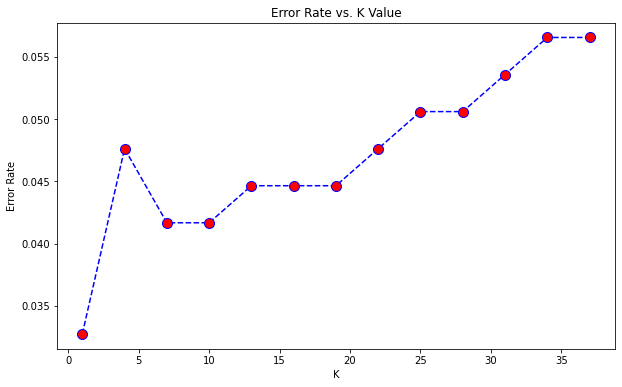

In [18]:
plt.figure(figsize = (10,6))
plt.plot(range(1,iters_range,3) , different_knn_standardized, color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

As it is visible from the above plot and from the accuracy values, K =1 gives the least error with accuracy = 96.72%. Hence, K = 1 is our required K-value.

# 2. Normalizing the variables

Using KNN Classifier after normalizing all the attributes (except class attribute) of Data.csv using Min-Max normalization to transform the data in the range [0-1]

In [19]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df.drop('Class', axis =1))
scaled_features = min_max_scaler.transform(df.drop('Class',axis=1))
df_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_features.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0.777126,0.781159,0.001893,0.001895,0.001743,0.002584,0.001653,0.002205,0.389163,0.402778,...,0.010178,0.475244,1.000000,1.0,0.435640,0.304749,0.350201,0.776416,0.457831,0.666856
1,0.000587,0.007022,0.003937,0.003941,0.002411,0.004403,0.003361,0.003368,0.133005,0.379630,...,0.010979,0.302455,0.915301,1.0,0.464333,0.315567,0.412309,0.871438,0.504936,0.972191
2,0.775953,0.777648,0.004975,0.004979,0.002149,0.004403,0.003306,0.002864,0.443350,0.379630,...,0.006747,0.196733,1.000000,1.0,0.454154,0.252064,0.419212,0.921521,0.481901,0.870715
3,0.776540,0.777648,0.005555,0.005557,0.001343,0.002202,0.002094,0.001821,0.458128,0.402778,...,0.005833,0.350649,1.000000,1.0,0.412682,0.235549,0.373612,0.887779,0.490433,0.523837
4,0.776540,0.778818,0.007286,0.007292,0.003878,0.005073,0.004407,0.005294,0.458128,0.407407,...,0.007548,0.188312,1.000000,1.0,0.506441,0.266994,0.448141,0.935694,0.493114,0.977980


In [20]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features,df['Class'],test_size=0.30)

In [21]:
different_knn_normalized, accuracy_normalized = knn_classifier(x_train, x_test, y_train, y_test, iters_range)

K = 1
Accuracy: 97.32
Confusion Matrix :
 [[112   2]
 [  7 215]] 


-----------------------------------------------------------

K = 4
Accuracy: 97.02
Confusion Matrix :
 [[113   1]
 [  9 213]] 


-----------------------------------------------------------

K = 7
Accuracy: 97.92
Confusion Matrix :
 [[111   3]
 [  4 218]] 


-----------------------------------------------------------

K = 10
Accuracy: 97.62
Confusion Matrix :
 [[110   4]
 [  4 218]] 


-----------------------------------------------------------

K = 13
Accuracy: 96.43
Confusion Matrix :
 [[106   8]
 [  4 218]] 


-----------------------------------------------------------

K = 16
Accuracy: 96.43
Confusion Matrix :
 [[106   8]
 [  4 218]] 


-----------------------------------------------------------

K = 19
Accuracy: 96.73
Confusion Matrix :
 [[107   7]
 [  4 218]] 


-----------------------------------------------------------

K = 22
Accuracy: 96.73
Confusion Matrix :
 [[107   7]
 [  4 218]] 


------------------------

Text(0, 0.5, 'Error Rate')

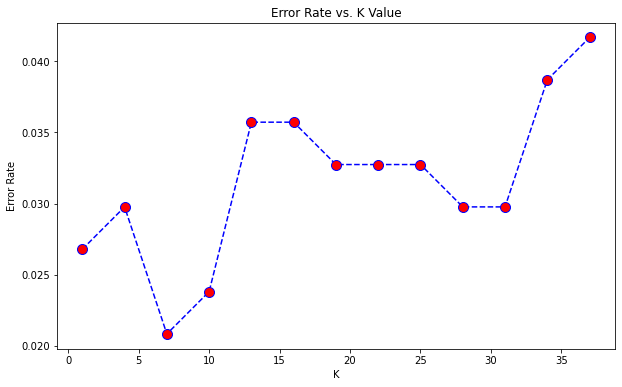

In [22]:
plt.figure(figsize = (10,6))
plt.plot(range(1, iters_range,3), different_knn_normalized, color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
print('Minimum error ', min(different_knn_normalized),' at ', different_knn_normalized.index(min(different_knn_normalized)))

Minimum error  0.020833333333333332  at  2


As it is visible from the above plot and from the accuracy values, K = 4 gives the least error with accuracy = 96.72%. Hence, K = 4 is our required K-value.

## Conclusion
As is visible from the Confusion matrix and the Error Rate vs. K Value plot:
        
        K = 1 has the highest accuracy of 96.72% when data has been standardized.
        
        